## Tutorial: Using QUIT for Variable Flip Angle T1 mapping

In this tutorial, I will demonstrate how to use QUIT's DESPOT1 function to produce T1 maps out of VFA MRI data. In this case, I have 4 SPGR MRI images with flip angles 2,5,10,15 and I'd like to produce one T1 map. 

First, follow the installation instructions for QUIT here: https://github.com/spinicist/QUIT

Then, you might want to check that you can successfully run the example_notebook.ipynb to verify that your installation has worked well - this is useful to know that it's not your data that's the problem!

If you're new to VFA, I highly recommend reading this blog post by Mathieu Boudreau first, which is an easy to follow explanation that will help you understand how VFA can be used to estimate T1: https://qmrlab.org/jekyll/2018/12/11/T1-mapping-variable-flip-angle.html

This tutorial is by Emma Bluemke. If you have questions, you can contact me on twitter @emmabluemke or tag me in a github issue @em-blue. 

## Step 1 - Imports

In [2]:
from QUIT.interfaces.relax import DESPOT1, DESPOT1Sim, DESPOT2
from nanslice import Layer
import nanslice.jupyter as ns
import nibabel as nib # run pip install nibabel in your terminal if you haven't already 
import numpy as np
import requests
import gzip
import os.path

# these are just for plotting the images afterward
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pylab
from pylab import annotate, axis
from PIL import Image

## Step 2 - Prepare Your Data 
The DESPOT1 function takes in 1 image which contains all 4 of the SPGR images. To get your images into this format, you'll need to concatenate all 4 SPGR images into one (in what would normally be the 'time' dimension'). You can do this easily using fslmerge using the following command in your terminal (replace these filenames with yours):

fslmerge -t concatenatedfile.nii.gz image1.nii.gz image2DEG.nii.gz image3DEG.nii.gz image4DEG.nii.gz 

(Note: the -t  means concatenate images in time)

For example, if you have 4 images, this will give you a file called concatenatedfile.nii.gz with the dimensons (X, Y, Z, 4). 

## Step 3 - Using the DESPOT1 function to produce a T1 map

In [50]:
# Change the TR here to match the TR of your SPGR images - this can be found in the header
# Change the flip angles here to match what you have
# Note that you can have more or fewer flip angles than 4 - and you should have one for each of your SPGR images
d1seq = {'SPGR': {'TR': 4e-3, 'FA': [2,5,10,15]}}

# you don't need to pre-load your concatenatedfile.nii.gz - just provide the name here (include the path needed to find it)
d1 = DESPOT1(sequence=d1seq, in_file='MR_Fast_SPGR_MERGE.nii.gz')

d1_result = d1.run() 


## Step 4 - Display Your T1 map

In [33]:
# this is what your T1 map will be named - D1_T1.nii.gz - it should have automatically saved in your working folder
t1map=nib.load('D1_T1.nii.gz') 
img_data = t1map.get_fdata()

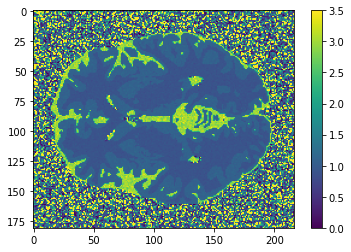

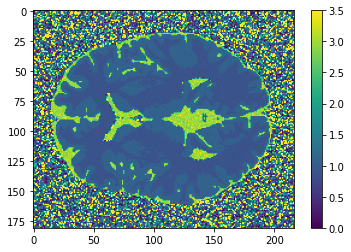

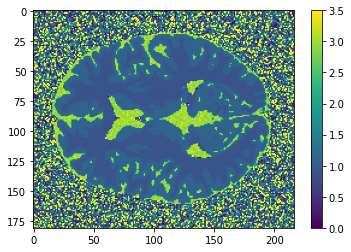

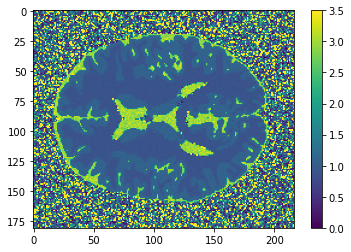

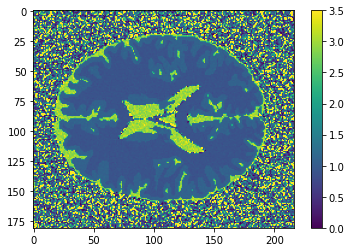

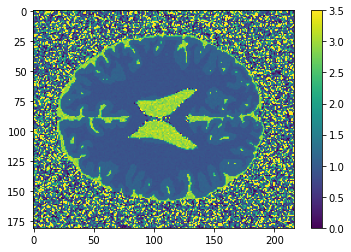

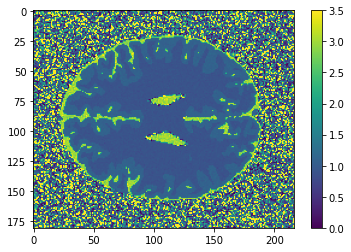

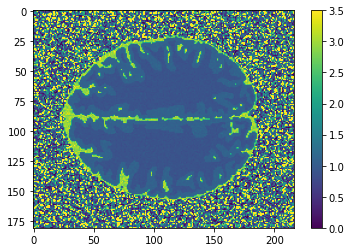

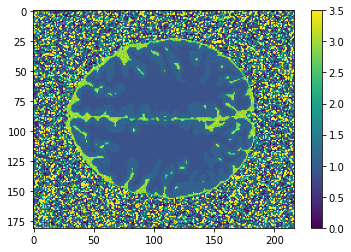

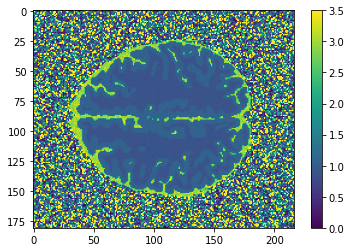

In [48]:
# If you'd like to display your images, here's how you'd load them in and view slice by slice: 


for i in range(70,120,5): # here I display every 5th slice in a middle range, but for all slices, use range(0,t1map.shape[0])
    im_slice=np.fliplr(np.rot90(img_data[i,:,:]))
    plt.imshow(im_slice)
    plt.clim(0,3.5) # This colorbar represents the T1 values in seconds. I've chosen 0-3500ms, but you can change this as you see fit
    plt.colorbar()
    plt.show()
    #plt.savefig(str(slice_counter)+'slices_demo.png')




## Credit QUIT
QUIT is subject to the terms of the Mozilla Public License, v. 2.0. The author is Tobias Wood - tobias.wood@kcl.ac.uk

If you have questions about the rest of QUIT and you can't find an answer to a problem in the documentation or help strings, you can open an issue, post a question on Neurostars or find the main developer on e-mail (tobias.wood@kcl.ac.uk) and Twitter (@spinicist).
